# Telco Customer Churn Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

This is an IBM sample data set of customer data. The goal of this project is to explore and analyse customer data and focus on building a model which can predict if a customer may be likely to leave or not. This can help build a customer rention marketing program and show the company what customers the company can invest resources in.

The start of the project will be feature exploration and find trends for the modelling. Once features have been explored and selected for modelling. The data will be cleaned and prepared for modelling.

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df_churn = df[df["Churn"] == "Yes"]
df_no_churn = df[df["Churn"] == "No"]

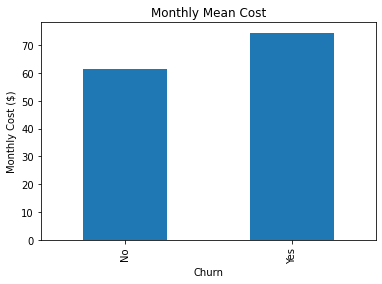

In [5]:
bar_mean = df.groupby(['Churn'])['MonthlyCharges'].mean()

bar_mean.plot.bar()
plt.title("Monthly Mean Cost")
plt.ylabel("Monthly Cost ($)");

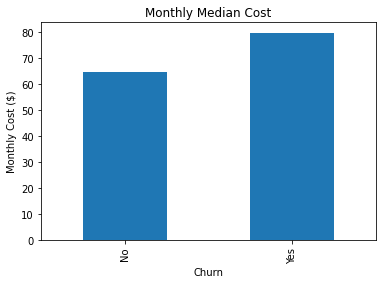

In [6]:
bar_median = df.groupby(['Churn'])['MonthlyCharges'].median()

bar_median.plot.bar()
plt.title("Monthly Median Cost")
plt.ylabel("Monthly Cost ($)");

From the two bar charts above showing the median and the mean. It's clear that the churn customers have on average an overall higher monthly cost than the non-churn customers. This will be an important feature in modelling and now let's look at the tenure length. Before exploration, we expect to see a lot more shorter "rolling" contracts for the churn customers. A key focus could be in trying to get customers to commit to the longer contract types.

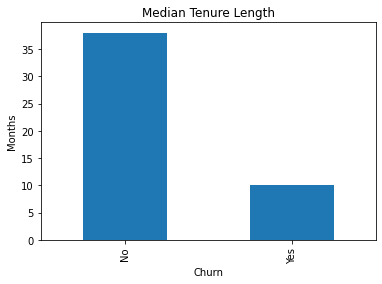

In [7]:
bar_tenure = df.groupby(['Churn'])['tenure'].median()

bar_tenure.plot.bar()
plt.title("Median Tenure Length")
plt.ylabel("Months");

The median for the tenure length is considerable different. The median is very high for the no churn group and this shows the important of fixed mid/long term contracts.

In [31]:
df.groupby(["Churn"]).mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


<AxesSubplot:ylabel='Churn'>

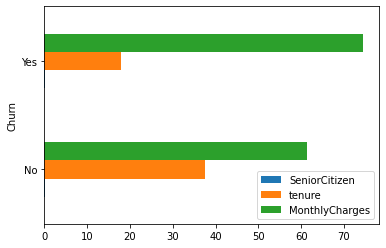

In [30]:
df.groupby(["Churn"]).mean().plot(kind = "barh")

From the chart and table above, we can see that generally the churn group are paying more and staying a lot less. This will most likely be to the higher monthly contract rates. Tenure length will definetely be a feature we will be keeping for modelling. Let's explore more about the contract lengths and type of services the customers are using.

In [9]:
churn_grouped = df.groupby(["Churn"])

In [10]:
churn_grouped["InternetService"].value_counts(normalize=True)

Churn  InternetService
No     DSL                0.379204
       Fiber optic        0.347700
       No                 0.273096
Yes    Fiber optic        0.693954
       DSL                0.245586
       No                 0.060460
Name: InternetService, dtype: float64

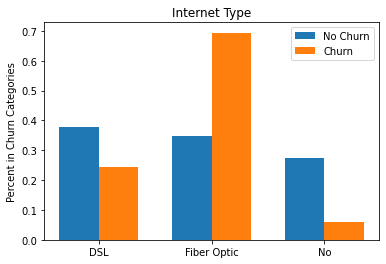

In [48]:
no = [0.379204, 0.347700, 0.273096]
yes = [0.245586, 0.693954, 0.060460]
labels = [ "DSL", "Fiber Optic", "No"]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no, width, label='No Churn')
rects2 = ax.bar(x + width/2, yes, width, label='Churn')


ax.set_ylabel('Percent in Churn Categories')
ax.set_title('Internet Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();


We can see that a very small percent of the churn group didn't have internet. The majority having fiber optic, as the no churn group is a bit more evenly distributed. The fiber optic service will be the reason for the higher average monthly price. It will be important to look into this service for customer feedback. Some things to consider are:
- Is the fiber optic priced correctly?
- Are customers happy with the service?
- Can the service be improved?

In [13]:
churn_grouped["Contract"].value_counts(normalize=True)

Churn  Contract      
No     Month-to-month    0.429068
       Two year          0.318322
       One year          0.252609
Yes    Month-to-month    0.885500
       One year          0.088818
       Two year          0.025682
Name: Contract, dtype: float64

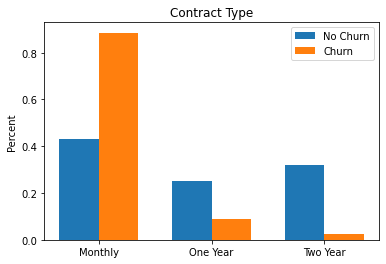

In [14]:
no = [0.429068, 0.252609, 0.318322]
yes = [0.885500, 0.088818, 0.025682]
labels = [ "Monthly", "One Year", "Two Year"]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no, width, label='No Churn')
rects2 = ax.bar(x + width/2, yes, width, label='Churn')


ax.set_ylabel('Percent')
ax.set_title('Contract Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();


As expected from the bar chart above. It's clear that the majority of churn customers are on a monhtly contract, this could explain the higher fees.

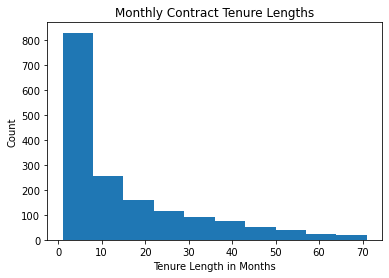

In [69]:
dummy = df_churn[df_churn["Contract"] == "Month-to-month"];
plt.hist(dummy["tenure"]);
plt.title("Monthly Contract Tenure Lengths");
plt.xlabel("Tenure Length in Months");
plt.ylabel("Count");

The histogram above shows the tenure lengths for the monthly contracts for the churn group. The chart is right skewed and the majority of the churn customers had tenure lengths of under 10 months.

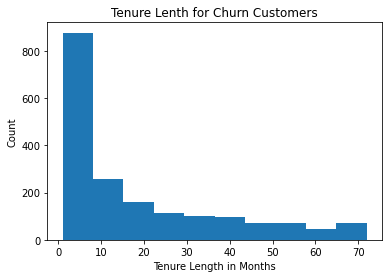

In [68]:
plt.hist(df_churn["tenure"]);
plt.title("Tenure Lenth for Churn Customers");
plt.xlabel("Tenure Length in Months");
plt.ylabel("Count");

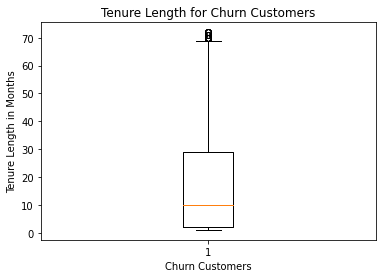

In [72]:
plt.boxplot(df_churn["tenure"]);
plt.title("Tenure Length for Churn Customers");
plt.xlabel("Churn Customers");
plt.ylabel("Tenure Length in Months");

As we can see from the boxplot and histogram above for churn customers, there is a wide range on tenure length. This will have an impact on the modelling. Tenure length is an important feature, so for the modelling a naive bayes classifier will be used as it is not sensitive to outliers. 

In [66]:
print("Median tenure length for monthly contracts: {}".format(dummy["tenure"].median()))
print("Mean tenure length for monthly contracts: {}".format(dummy["tenure"].mean()))

Median tenure length for monthly contracts: 7.0
Mean tenure length for monthly contracts: 14.016918429003022


In [29]:
churn_grouped["Dependents"].value_counts()

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64

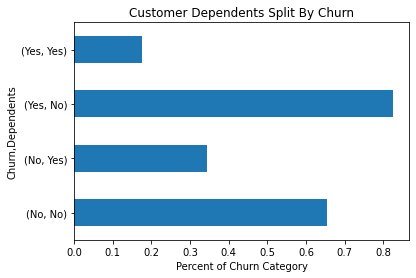

In [45]:
churn_grouped["Dependents"].value_counts(normalize=True).plot(kind="barh");
plt.title("Customer Dependents Split By Churn");
plt.xlabel("Percent of Churn Category");

There doesn't seem to be any relevant link between customers who have dependents and those who don't. A few more features will be explored to see what services customers were using before modelling.

In [34]:
churn_grouped["StreamingMovies"].value_counts()

Churn  StreamingMovies    
No     Yes                    1914
       No                     1847
       No internet service    1413
Yes    No                      938
       Yes                     818
       No internet service     113
Name: StreamingMovies, dtype: int64

In [35]:
churn_grouped["StreamingTV"].value_counts()

Churn  StreamingTV        
No     Yes                    1893
       No                     1868
       No internet service    1413
Yes    No                      942
       Yes                     814
       No internet service     113
Name: StreamingTV, dtype: int64

In [36]:
churn_grouped["TechSupport"].value_counts()

Churn  TechSupport        
No     No                     2027
       Yes                    1734
       No internet service    1413
Yes    No                     1446
       Yes                     310
       No internet service     113
Name: TechSupport, dtype: int64

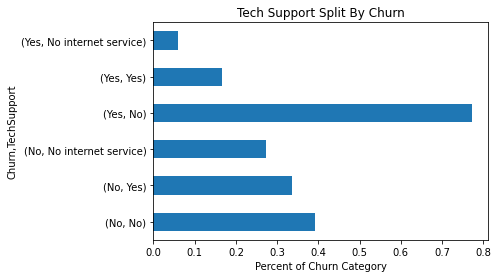

In [46]:
churn_grouped["TechSupport"].value_counts(normalize=True).plot(kind = "barh");
plt.title("Tech Support Split By Churn");
plt.xlabel("Percent of Churn Category");

There doesn't seem to be any relevant link between customers who used streaming services. It does seem like a large percent of churn customers did not have tech support. This feature can be kept and used to see if it improves the model.